# Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import xgboost as xgb
import warnings
import pickle
import kagglehub


# Visualizing and analyzing data

## Loading the dataset 

In [6]:


# Download the dataset from KaggleHub
path = kagglehub.dataset_download("rupakroy/online-payments-fraud-detection-dataset")

# Confirm the local path to the dataset
print("Path to dataset files:", path)


Path to dataset files: /Users/kanishkkarthick/.cache/kagglehub/datasets/rupakroy/online-payments-fraud-detection-dataset/versions/1


In [7]:
import os
for file in os.listdir(path):
    if file.endswith('.csv'):
        dataset_file = os.path.join(path, file)
        break

df = pd.read_csv(dataset_file)
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (6362620, 11)


## Reading the data

In [8]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df.drop(["isFlaggedFraud"],axis=1, inplace=True)

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [12]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [13]:

plt.style.use('ggplot')
warnings.filterwarnings("ignore")

In [14]:


selected_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                 'oldbalanceDest', 'newbalanceDest', 'isFraud']

df[selected_cols].corr()




,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


<Axes: >

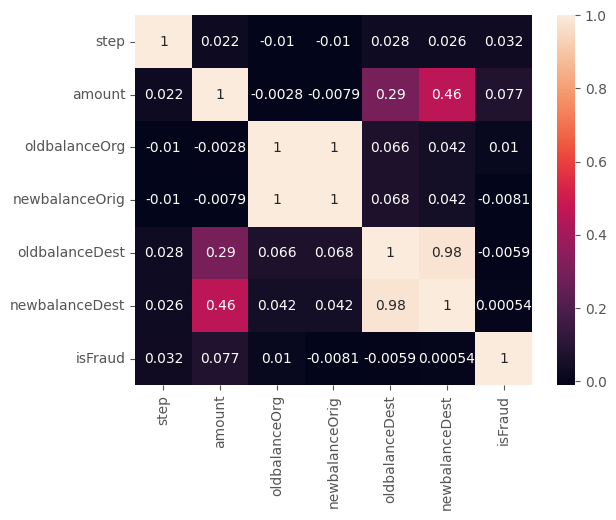

In [15]:
sns.heatmap(df[selected_cols].corr(), annot=True,)

## Univariate Analysis

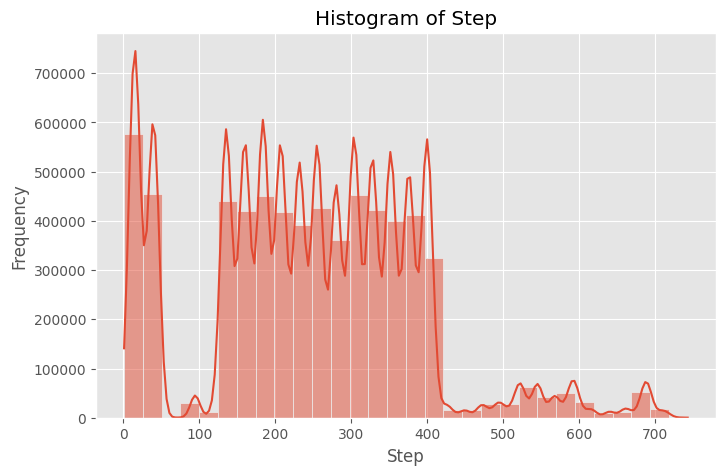

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df,x='step' ,bins=30, kde=True)
plt.title('Histogram of Step')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='step'>

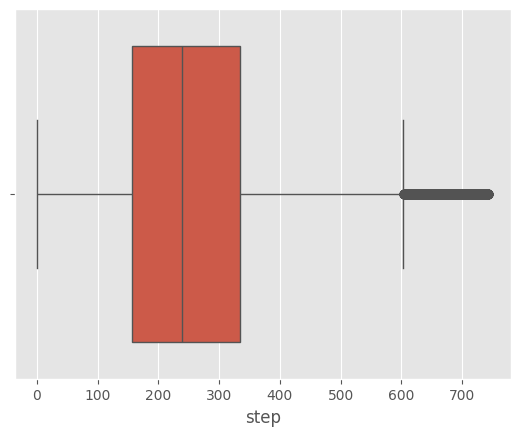

In [17]:

sns.boxplot(x='step', data=df)


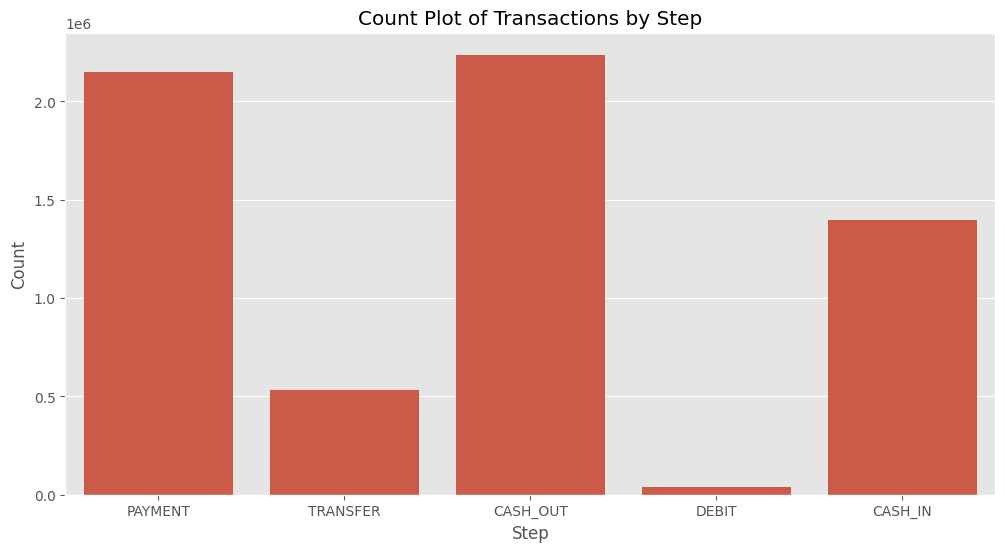

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=df)
plt.title('Count Plot of Transactions by Step')
plt.xlabel('Step')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='amount', ylabel='Count'>

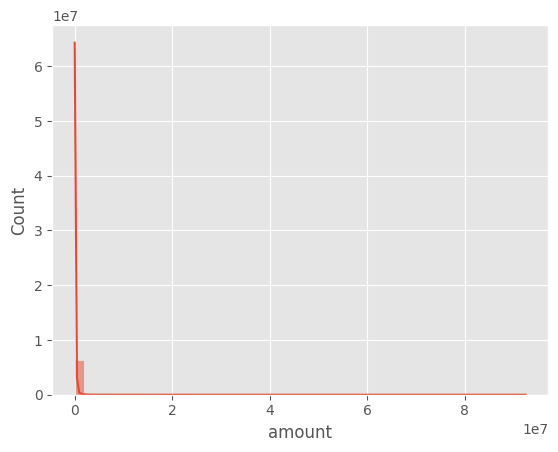

In [19]:
sns.histplot(df['amount'], bins=50, kde=True)

<Axes: xlabel='amount'>

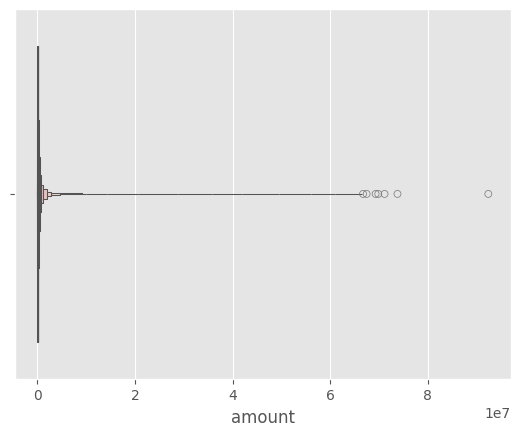

In [20]:
sns.boxenplot(data=df,x='amount')

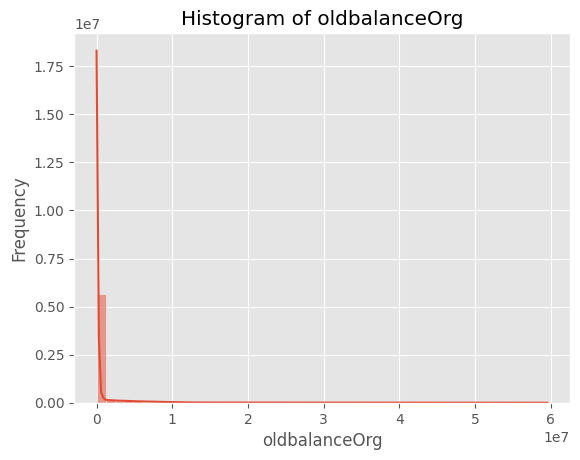

In [21]:
sns.histplot(df['oldbalanceOrg'], bins=50, kde=True)
plt.title('Histogram of oldbalanceOrg')
plt.xlabel('oldbalanceOrg')
plt.ylabel('Frequency')
plt.show()

In [22]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceDest'>

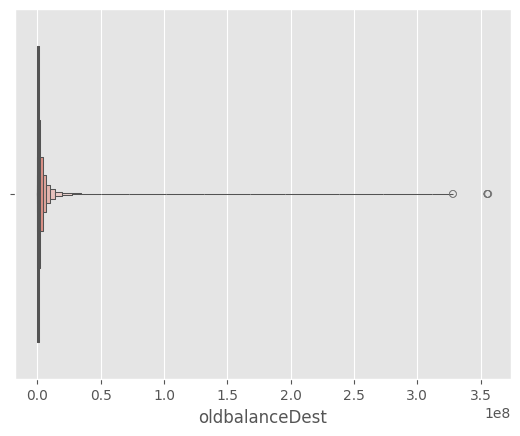

In [23]:
sns.boxenplot(x='oldbalanceDest', data=df)

<Axes: xlabel='newbalanceDest'>

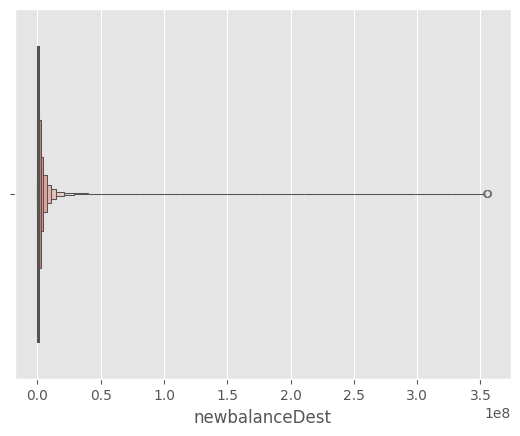

In [24]:
sns.boxenplot(x='newbalanceDest', data=df)

<Axes: xlabel='isFraud', ylabel='count'>

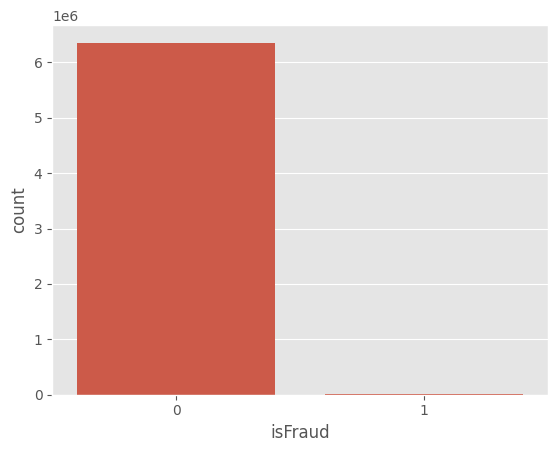

In [25]:
sns.countplot(x='isFraud', data=df)

In [26]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [27]:
df.loc[df['isFraud']==0,'isFraud']='is not fraud'
df.loc[df['isFraud']==1,'isFraud']='is fraud'
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,is fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,is fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,is fraud
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,is fraud
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,is fraud
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,is fraud


## Bivariant Analysis

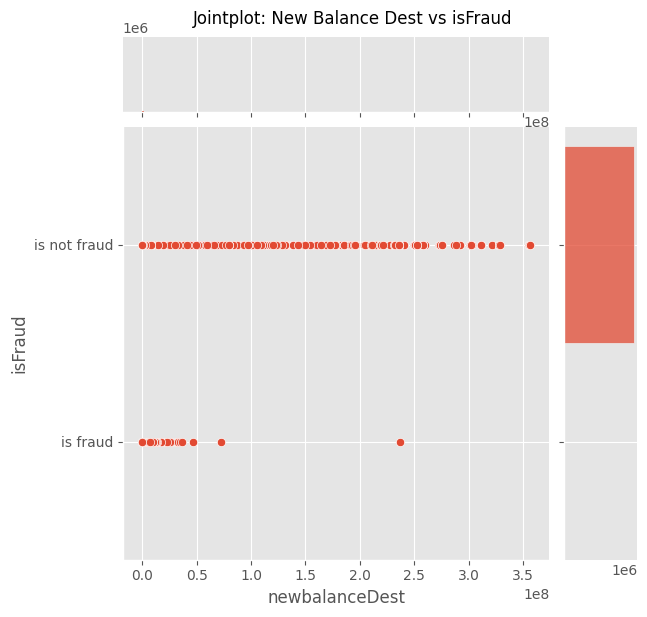

In [28]:
sns.jointplot(data=df, x='newbalanceDest', y='isFraud')
plt.suptitle("Jointplot: New Balance Dest vs isFraud", y=1.02)
plt.show()

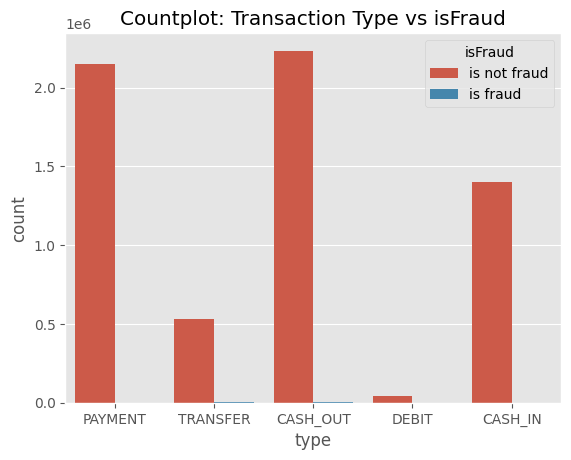

In [29]:
sns.countplot(data=df, x='type', hue='isFraud')
plt.title("Countplot: Transaction Type vs isFraud")
plt.show()


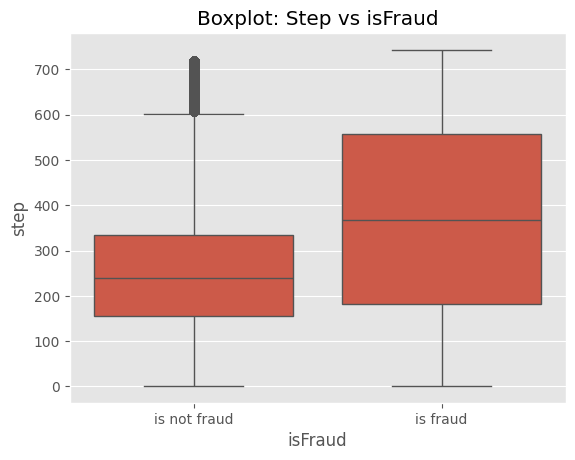

In [30]:
sns.boxplot(data=df, x='isFraud', y='step')
plt.title("Boxplot: Step vs isFraud")
plt.show()


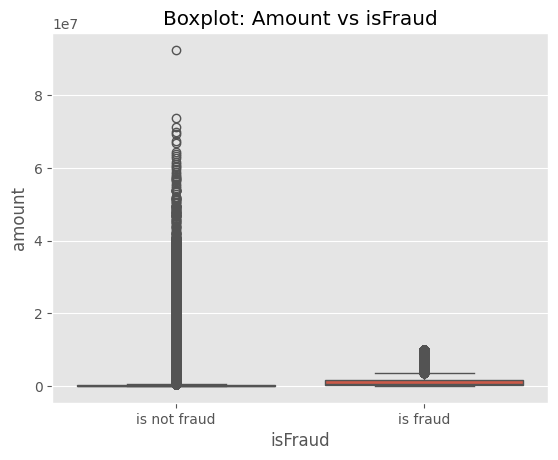

In [31]:
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title("Boxplot: Amount vs isFraud")
plt.show()


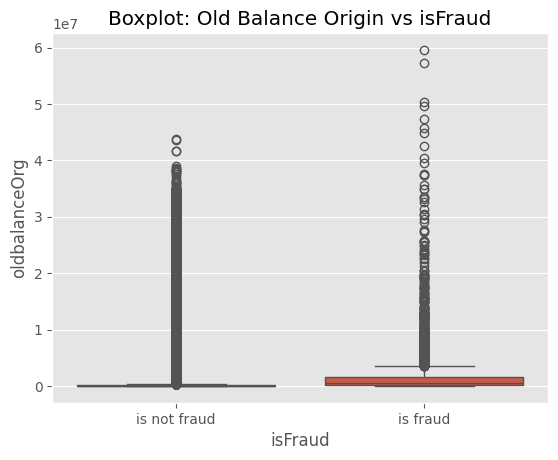

In [32]:
sns.boxplot(data=df, x='isFraud', y='oldbalanceOrg')
plt.title("Boxplot: Old Balance Origin vs isFraud")
plt.show()

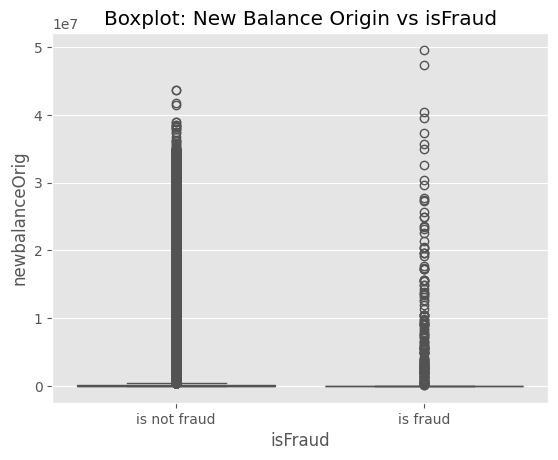

In [33]:

sns.boxplot(data=df, x='isFraud', y='newbalanceOrig')
plt.title("Boxplot: New Balance Origin vs isFraud")
plt.show()

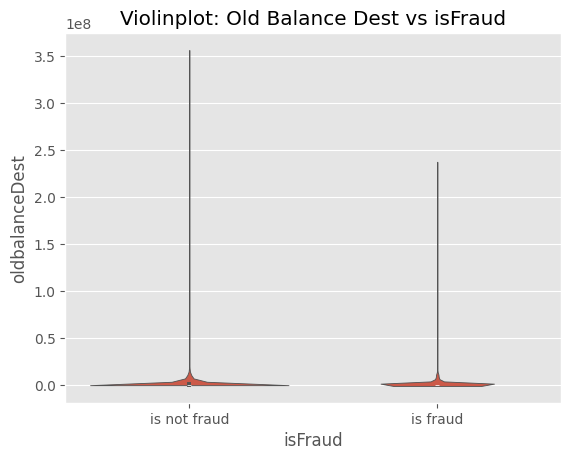

In [34]:

sns.violinplot(data=df, x='isFraud', y='oldbalanceDest')
plt.title("Violinplot: Old Balance Dest vs isFraud")
plt.show()

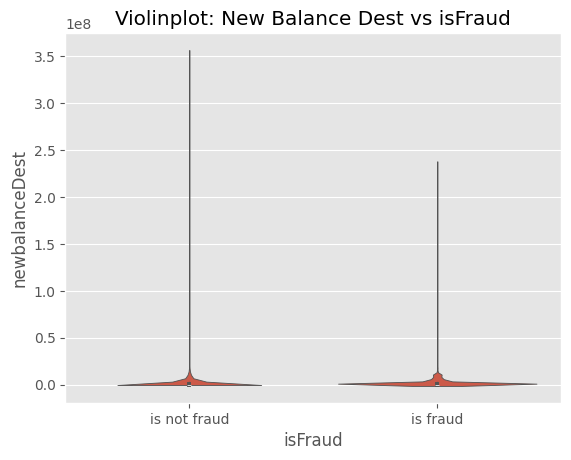

In [35]:
sns.violinplot(data=df, x='isFraud', y='newbalanceDest')
plt.title("Violinplot: New Balance Dest vs isFraud")
plt.show()

## Descriptive Analysis

In [36]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


# Preprocessing

## Checking for NULL values

In [37]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         object 
dtypes: float64(5), int64(1), object(4)
memory usage: 485.4+ MB


## Handling Outliners

<Axes: ylabel='amount'>

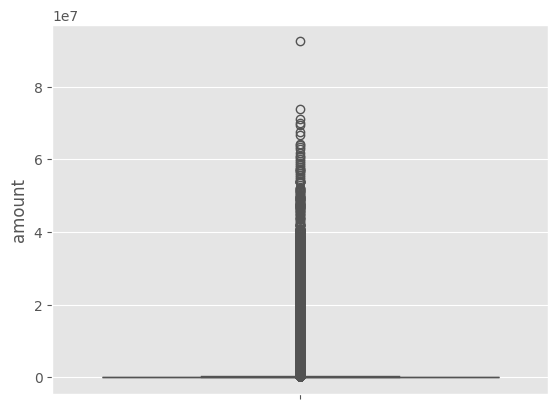

In [39]:
sns.boxplot(df['amount'])

In [40]:
mode_result = stats.mode(df['amount'], keepdims=True)
print("Mode:", mode_result)

mean_value = np.mean(df['amount'])
print("Mean:", mean_value)

Mode: ModeResult(mode=array([10000000.]), count=array([3207]))
Mean: 179861.90354913071


In [41]:
q1 = np.quantile(df['amount'], 0.25)
q3 = np.quantile(df['amount'], 0.75)
IQR = q3 - q1

upper_bound = q3 + (1.5 * IQR)
lower_bound = q1 - (1.5 * IQR)

print('Q1 :', q1)
print('Q3 :', q3)
print('IQR :', IQR)
print('Upper Bound :', upper_bound)
print('Lower Bound :', lower_bound)

# Skewed Data Count
print('Skewed data above upper bound:', len(df[df['amount'] > upper_bound]))
print('Skewed data below lower bound:', len(df[df['amount'] < lower_bound]))

Q1 : 13389.57
Q3 : 208721.4775
IQR : 195331.9075
Upper Bound : 501719.33875
Lower Bound : -279608.29125
Skewed data above upper bound: 338078
Skewed data below lower bound: 0


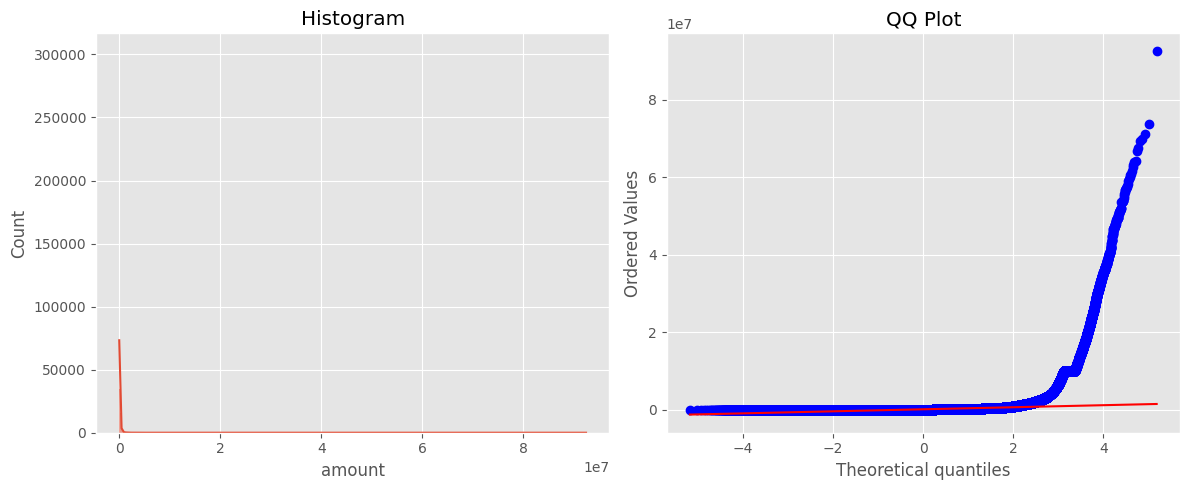

In [42]:
def transformationPlot(feature):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(feature, kde=True)
    plt.title("Histogram")

    plt.subplot(1, 2, 2)
    stats.probplot(feature, dist="norm", plot=plt)
    plt.title("QQ Plot")

    plt.tight_layout()
    plt.show()

# Example use:
transformationPlot(df['amount'])

## Object data labelencoding

In [43]:
la= LabelEncoder()
df['type'] = la.fit_transform(df['type'])
df['type'].value_counts()


type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [44]:
x=df.drop(['isFraud'], axis=1)
y=df['isFraud']

In [45]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00


In [46]:
y

0          is not fraud
1          is not fraud
2              is fraud
3              is fraud
4          is not fraud
               ...     
6362615        is fraud
6362616        is fraud
6362617        is fraud
6362618        is fraud
6362619        is fraud
Name: isFraud, Length: 6362620, dtype: object

## Split Data

In [47]:
df_model = df.drop(['nameOrig', 'nameDest'], axis=1)


df_model['type'] = df_model['type'].astype('category').cat.codes


X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
x_train.shape


(5090096, 7)

In [49]:
x_test.shape


(1272524, 7)

In [50]:
y_train.shape


(5090096,)

In [51]:
y_test.shape

(1272524,)

# Model Building

## Random Forest

In [52]:
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)



In [54]:
test_acc, train_acc

(0.9997170976735998, 0.9999998035400511)

In [55]:
classification_report(y_test, y_test_pred)

'              precision    recall  f1-score   support\n\n    is fraud       0.97      0.80      0.88      1629\nis not fraud       1.00      1.00      1.00   1270895\n\n    accuracy                           1.00   1272524\n   macro avg       0.99      0.90      0.94   1272524\nweighted avg       1.00      1.00      1.00   1272524\n'

## Decision tree Classifier

In [56]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
y_test_predict2 = dtc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict2)
print(test_accuracy)

0.9997178835133954


In [58]:
y_train_predict2 = dtc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict2)
print(train_accuracy)

1.0


In [59]:
pd.crosstab(y_test, y_test_predict2)

col_0,is fraud,is not fraud
isFraud,,
is fraud,1438,191
is not fraud,168,1270727


In [60]:
print(classification_report(y_test, y_test_predict2))

              precision    recall  f1-score   support

    is fraud       0.90      0.88      0.89      1629
is not fraud       1.00      1.00      1.00   1270895

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



## ExtraTrees Classifier

In [61]:
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [62]:
y_test_predict3 = etc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict3)
print(test_accuracy)


0.9997092392756443


In [63]:
y_train_predict3 = etc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict3)
print(train_accuracy)


1.0


In [64]:
print(pd.crosstab(y_test, y_test_predict3))


col_0         is fraud  is not fraud
isFraud                             
is fraud          1273           356
is not fraud        14       1270881


In [65]:
print(classification_report(y_test, y_test_predict3))

              precision    recall  f1-score   support

    is fraud       0.99      0.78      0.87      1629
is not fraud       1.00      1.00      1.00   1270895

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



## SupportVectorMachine Classifier

In [66]:
svc = SVC()
svc.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [67]:
y_train_predict4 = svc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict4)
train_accuracy

0.9991589549588062

In [68]:
y_train_predict4 = svc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict4)
train_accuracy

0.9991589549588062

In [69]:
y_test_predict4 = svc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict4)
test_accuracy

0.9991465779820262

In [70]:
pd.crosstab(y_test, y_test_predict4)

col_0,is fraud,is not fraud
isFraud,,
is fraud,547,1082
is not fraud,4,1270891


In [71]:
print(classification_report(y_test, y_test_predict4))

              precision    recall  f1-score   support

    is fraud       0.99      0.34      0.50      1629
is not fraud       1.00      1.00      1.00   1270895

    accuracy                           1.00   1272524
   macro avg       1.00      0.67      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



In [72]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [73]:
la = LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [74]:
y_test1 = la.transform(y_test)

In [75]:
y_test1,y_train1

(array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]))

## XGboost

In [76]:
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train, y_train1)

y_test_predict5 = xgb1.predict(x_test)
test_accuracy = accuracy_score(y_test1, y_test_predict5)
test_accuracy

0.9978735175132257

In [77]:
y_train_predict5 = xgb1.predict(x_train)
train_accuracy = accuracy_score(y_train1, y_train_predict5)
train_accuracy

0.9979495475134457

In [78]:
pd.crosstab(y_test1, y_test_predict5)

col_0,0,1
row_0,,
0,230,1399
1,1307,1269588


In [79]:
print(classification_report(y_test1, y_test_predict5))

              precision    recall  f1-score   support

           0       0.15      0.14      0.15      1629
           1       1.00      1.00      1.00   1270895

    accuracy                           1.00   1272524
   macro avg       0.57      0.57      0.57   1272524
weighted avg       1.00      1.00      1.00   1272524



## comparing models

In [80]:
def compareModel():
    print("train accuracy for rfc", accuracy_score(y_train_pred, y_train))
    print("test accuracy for rfc", accuracy_score(y_test_pred, y_test))

    print("train accuracy for dtc", accuracy_score(y_train_predict2, y_train))
    print("test accuracy for dtc", accuracy_score(y_test_predict2, y_test))

    print("train accuracy for etc", accuracy_score(y_train_predict3, y_train))
    print("test accuracy for etc", accuracy_score(y_test_predict3, y_test))

    print("train accuracy for svcc", accuracy_score(y_train_predict4, y_train))
    print("test accuracy for svcc", accuracy_score(y_test_predict4, y_test))

    print("train accuracy for xgb1", accuracy_score(y_train_predict5, y_train1))
    print("test accuracy for xgb1", accuracy_score(y_test_predict5, y_test1))
compareModel()

train accuracy for rfc 0.9999998035400511
test accuracy for rfc 0.9997170976735998
train accuracy for dtc 1.0
test accuracy for dtc 0.9997178835133954
train accuracy for etc 1.0
test accuracy for etc 0.9997092392756443
train accuracy for svcc 0.9991589549588062
test accuracy for svcc 0.9991465779820262
train accuracy for xgb1 0.9979495475134457
test accuracy for xgb1 0.9978735175132257


## Evaluating performance of the model and saving the model

In [81]:
svc = SVC()
svc.fit(x_train, y_train)

y_test_predict4 = svc.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_predict4)
test_accuracy

0.9991465779820262

In [82]:
y_train_predict4 = svc.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_predict4)
train_accuracy

0.9991589549588062

In [83]:
pickle.dump(svc, open('payments.pkl', 'wb'))